In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np

In [3]:
df = pd.read_csv('/content/parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.tail(18)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
177,phon_R01_S44_1,151.737,190.204,129.859,0.00314,0.00002,0.00135,0.00162,0.00406,0.01469,0.132,0.00728,0.00886,0.01230,0.02184,0.00570,24.151,1,0.396610,0.745957,-6.486822,0.197919,2.449763,0.132703
178,phon_R01_S44_2,148.790,158.359,138.990,0.00309,0.00002,0.00152,0.00186,0.00456,0.01574,0.142,0.00839,0.00956,0.01309,0.02518,0.00488,24.412,1,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
179,phon_R01_S44_3,148.143,155.982,135.041,0.00392,0.00003,0.00204,0.00231,0.00612,0.01450,0.131,0.00725,0.00876,0.01263,0.02175,0.00540,23.683,1,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
180,phon_R01_S44_4,150.440,163.441,144.736,0.00396,0.00003,0.00206,0.00233,0.00619,0.02551,0.237,0.01321,0.01574,0.02148,0.03964,0.00611,23.133,1,0.352396,0.759320,-6.261446,0.183218,2.264226,0.144105
181,phon_R01_S44_5,148.462,161.078,141.998,0.00397,0.00003,0.00202,0.00235,0.00605,0.01831,0.163,0.00950,0.01103,0.01559,0.02849,0.00639,22.866,1,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
182,phon_R01_S44_6,149.818,163.417,144.786,0.00336,0.00002,0.00174,0.00198,0.00521,0.02145,0.198,0.01155,0.01341,0.01666,0.03464,0.00595,23.008,1,0.329577,0.757180,-6.277170,0.109397,2.209021,0.156368
183,phon_R01_S49_1,117.226,123.925,106.656,0.00417,0.00004,0.00186,0.00270,0.00558,0.01909,0.171,0.00864,0.01223,0.01949,0.02592,0.00955,23.079,0,0.603515,0.669565,-5.619070,0.191576,2.027228,0.215724
184,phon_R01_S49_2,116.848,217.552,99.503,0.00531,0.00005,0.00260,0.00346,0.00780,0.01795,0.163,0.00810,0.01144,0.01756,0.02429,0.01179,22.085,0,0.663842,0.656516,-5.198864,0.206768,2.120412,0.252404
185,phon_R01_S49_3,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,0.136,0.00667,0.00990,0.01691,0.02001,0.00737,24.199,0,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,0.154,0.00820,0.00972,0.01491,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Model Validation


In [7]:
y = df['status']
X = df.drop(columns = ['status', 'name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)','MDVP:Flo(Hz)', 'MDVP:RAP', 'MDVP:PPQ', 'MDVP:APQ', 'spread1', 'spread2','D2' ])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Default Classifier Model

In [8]:
df['status'].value_counts(normalize = 'True')

1    0.753846
0    0.246154
Name: status, dtype: float64

In [12]:
all_ones = np.ones(len(y_test))
all_ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [13]:
class_report_default = classification_report(y_test, all_ones);
print(class_report_default)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.76      1.00      0.86        37

    accuracy                           0.76        49
   macro avg       0.38      0.50      0.43        49
weighted avg       0.57      0.76      0.65        49



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN ** Basic Model** on Averaged Data

In [14]:
scaler = StandardScaler ()
scaled_df = scaler.fit_transform(X_train)

In [15]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

numeric_selector = make_column_selector(dtype_include = 'number')
scaler_tuple = (scaler, numeric_selector)
col_transformer = make_column_transformer(scaler_tuple, remainder = 'passthrough')
pipe = make_pipeline(col_transformer, knn)

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f112c066650>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [17]:
y_pred = pipe.predict(X_test)
y_pred_knn_train = pipe.predict(X_train)

In [18]:
knn_train_accuracy = accuracy_score(y_train, y_pred_knn_train)
print(f'KNN Train Accuracy: {knn_train_accuracy}')

KNN Train Accuracy: 0.8835616438356164


In [19]:
knn_test_accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Test Accuracy: {knn_test_accuracy}')

KNN Test Accuracy: 0.8367346938775511


In [20]:
class_report_knn_basic = classification_report(y_pred, y_test)
print(class_report_knn_basic)

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.86      0.91      0.89        35

    accuracy                           0.84        49
   macro avg       0.81      0.78      0.79        49
weighted avg       0.83      0.84      0.83        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


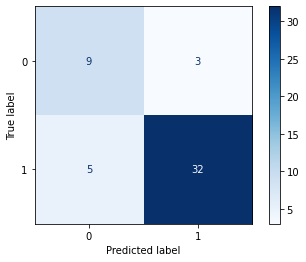

In [21]:
plot_confusion_matrix(pipe, X_test, y_test, cmap = 'Blues');

# Optimize KNN on Averaged Data

Minimum error:- 0.061224489795918366 at K = 1


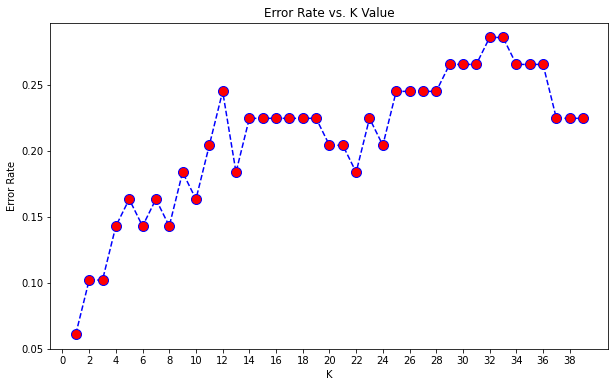

In [22]:
error_rate = []   #source: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
for i in range(1,40):          #Finding minimum error
 knn1 = KNeighborsClassifier(n_neighbors=i)
 pipe_knn1 = make_pipeline(col_transformer,knn1)

 pipe_knn1.fit(X_train,y_train)
 pred_i = pipe_knn1.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.xticks(np.arange(0,40, step=2))
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum accuracy:- 0.9387755102040817 at K = 1


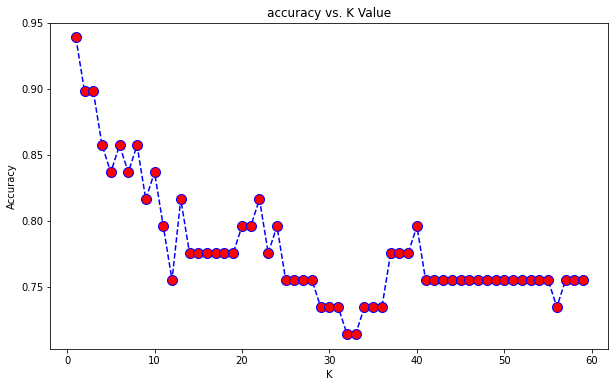

In [23]:
acc = [] #source: https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb
from sklearn import metrics #finding maximum accuracy
for i in range(1,60):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    pipe_knn1 = make_pipeline(col_transformer,knn1)
    pipe_knn1.fit(X_train,y_train)    
    yhat = pipe_knn1.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,60),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",(acc.index(max(acc))+1))

In [24]:
scaler = StandardScaler()
knn_n1 = KNeighborsClassifier(n_neighbors=1)

numeric_selector = make_column_selector(dtype_include = 'number')
scaler_tuple = (scaler, numeric_selector)
col_transformer = make_column_transformer(scaler_tuple, remainder = 'passthrough')
pipe1 = make_pipeline(col_transformer, knn_n1)

In [25]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f112be99910>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [26]:
y_pred_knn_n1 = pipe1.predict(X_test)

In [27]:
y_pred_knn_n1_train = pipe1.predict(X_train)

In [28]:
knn_n1_train_accuracy = accuracy_score(y_train, y_pred_knn_n1_train)
print(f'KNN with n_neighbors = 1 Train Accuracy: {knn_n1_train_accuracy}')

KNN with n_neighbors = 1 Train Accuracy: 1.0


In [29]:
knn_n1_test_accuracy = accuracy_score(y_test, y_pred_knn_n1)
print(f'KNN with n_neighbors = 1 Test Accuracy: {knn_n1_test_accuracy}')

KNN with n_neighbors = 1 Test Accuracy: 0.9387755102040817


In [30]:
class_report_knn_n1 = classification_report(y_test, y_pred_knn_n1)
print(class_report_knn_n1)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.95      0.97      0.96        37

    accuracy                           0.94        49
   macro avg       0.93      0.90      0.91        49
weighted avg       0.94      0.94      0.94        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


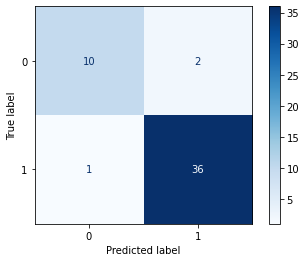

In [31]:
plot_confusion_matrix(pipe1, X_test, y_test, cmap = 'Blues');

# Light Gradient Boosting Machine - Base Model

In [32]:
lgb = LGBMClassifier()

In [33]:
pipe_lgb = make_pipeline(col_transformer, lgb)

In [34]:
pipe_lgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f112be99910>)])),
                ('lgbmclassifier', LGBMClassifier())])

In [35]:
y_pred_lgb_train = pipe_lgb.predict(X_train)
y_pred_lgb_test = pipe_lgb.predict(X_test)

In [36]:
accuracy_lgb_train = accuracy_score(y_train, y_pred_lgb_train)
print(f'Light Gradient Boosting Train Accuracy: {accuracy_lgb_train}')

Light Gradient Boosting Train Accuracy: 1.0


In [37]:
accuracy_lgb_test = accuracy_score(y_test, y_pred_lgb_test)
print(f'Light Gradient Boosting Test Accuracy: {accuracy_lgb_test}')

Light Gradient Boosting Test Accuracy: 0.8775510204081632


In [38]:
class_report_lgb = classification_report(y_test, y_pred_lgb_test)
print(class_report_lgb)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.94      0.89      0.92        37

    accuracy                           0.88        49
   macro avg       0.83      0.86      0.84        49
weighted avg       0.89      0.88      0.88        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


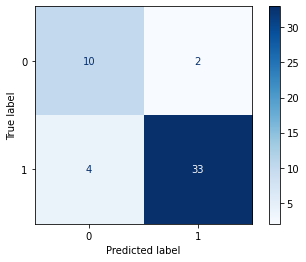

In [39]:
plot_confusion_matrix(pipe_lgb, X_test, y_test, cmap = 'Blues');

# Light Gradient Boosting Machine - Optimized

In [40]:
params = {'lgbmclassifier__max_depth': range(5,9),
          'lgbmclassifier__num_leaves': range(4,14),
          'lgbmclassifier__min_data_in_leaf': range(1,4)}

In [41]:
lgb_gridsearch = GridSearchCV(pipe_lgb, params, cv = 5)

In [42]:
lgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f112be99910>)])),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': range(5, 9),
                         'lgbmclassifier__min_data_in_leaf': range(1, 4),
                         'lgbmclassifier__num_leaves': range(4, 14)})

In [43]:
print(lgb_gridsearch.best_params_)

{'lgbmclassifier__max_depth': 5, 'lgbmclassifier__min_data_in_leaf': 2, 'lgbmclassifier__num_leaves': 7}


In [44]:
lgb_model_1 = lgb_gridsearch.best_estimator_

In [45]:
y_pred_lgb_model_1 = lgb_model_1.predict(X_test)

In [46]:
lgb_best_test_accuracy = accuracy_score(y_test, y_pred_lgb_model_1)
print(f'Light Gradient Boosting Train Accuracy: {lgb_best_test_accuracy}')

Light Gradient Boosting Train Accuracy: 0.9183673469387755


In [47]:
params1 = {'lgbmclassifier__max_depth': range(2,5),
          'lgbmclassifier__num_leaves': range(2,4),
          'lgbmclassifier__min_data_in_leaf': range(2,4)}

In [48]:
gridsearch_lgb_2nd = GridSearchCV(pipe_lgb, params1, cv = 10)

In [49]:
gridsearch_lgb_2nd.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f112be99910>)])),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': range(2, 5),
                         'lgbmclassifier__min_data_in_leaf': range(2, 4),
                         'lgbmclassifier__num_leaves': range(2, 4)})

In [50]:
print(gridsearch_lgb_2nd.best_params_)

{'lgbmclassifier__max_depth': 2, 'lgbmclassifier__min_data_in_leaf': 2, 'lgbmclassifier__num_leaves': 3}


In [51]:
lgb_best = lgb_gridsearch.best_estimator_

In [52]:
y_pred_lgb_best = lgb_best.predict(X_test)
y_pred_lgb_best_train = lgb_best.predict(X_train)

In [53]:
lgb_best_train_accuracy = accuracy_score(y_train, y_pred_lgb_best_train)
print(f'Light Gradient Boosting Optimized Train Accuracy: {lgb_best_train_accuracy}')

Light Gradient Boosting Optimized Train Accuracy: 1.0


In [54]:
lgb_best_test_accuracy = accuracy_score(y_test, y_pred_lgb_best)
print(f'Light Gradient Boosting Test Optimized Accuracy: {lgb_best_test_accuracy}')

Light Gradient Boosting Test Optimized Accuracy: 0.9183673469387755


In [55]:
class_report_lgb_best = classification_report(y_test, y_pred_lgb_best)
print(class_report_lgb_best)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.95      0.95      0.95        37

    accuracy                           0.92        49
   macro avg       0.89      0.89      0.89        49
weighted avg       0.92      0.92      0.92        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


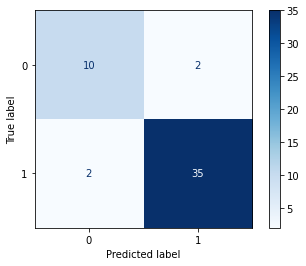

In [56]:
plot_confusion_matrix(lgb_best, X_test, y_test, cmap = 'Blues');

# Extreme Gradient Boosting Machine - Base Model

In [57]:
xgb = XGBClassifier()

In [58]:
pipe_xgb = make_pipeline(col_transformer, xgb)

In [59]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f112be99910>)])),
                ('xgbclassifier', XGBClassifier())])

In [60]:
y_pred_xgb_test = pipe_xgb.predict(X_test)
y_pred_xgb_train = pipe_xgb.predict(X_train)

In [61]:
xgb_train_accuracy = accuracy_score(y_train, y_pred_xgb_train)
print(f'Extreme Gradient Boosting Train Accuracy: {xgb_train_accuracy}')

Extreme Gradient Boosting Train Accuracy: 1.0


In [62]:
xgb_test_accuracy = accuracy_score(y_test, y_pred_xgb_test)
print(f'Extreme Gradient Boosting Test Accuracy: {xgb_test_accuracy}')

Extreme Gradient Boosting Test Accuracy: 0.8163265306122449


In [63]:
class_report_xgb = classification_report(y_pred_xgb_test, y_test)
print(class_report_xgb)

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.84      0.91      0.87        34

    accuracy                           0.82        49
   macro avg       0.79      0.76      0.77        49
weighted avg       0.81      0.82      0.81        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


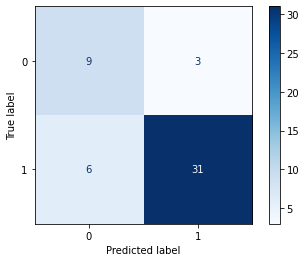

In [64]:
plot_confusion_matrix(pipe_xgb, X_test, y_test, cmap = 'Blues');

In [65]:
params = {
    'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.05, 0.1, 0.3, 0.5, 0.7],
    'xgbclassifier__max_depth': [2, 3, 5, 10, 15]}

In [66]:
xgb_gridsearch = GridSearchCV(pipe_xgb, params, cv = 3, refit = True)

In [67]:
xgb_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f112be99910>)])),
                                       ('xgbclassifier', XGBClassifier())]),
             param_grid={'xgbclassifier__learning_rate': [0.05, 0.1, 0.3, 0.5,
                                                          0.7],
                         'xgbclassifier__max_depth': [2, 3, 5, 10, 15],
                         'xgbclassifier__n_estimators': [50, 100, 150, 200]})

In [68]:
print(xgb_gridsearch.best_params_)

{'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 150}


In [69]:
xgb_opt_model = xgb_gridsearch.best_estimator_

In [70]:
y_pred_xgb_opt_test = xgb_opt_model.predict(X_test)
y_pred_xgb_opt_train = xgb_opt_model.predict(X_train)

In [71]:
xgb_opt_train_accuracy = accuracy_score(y_train, y_pred_xgb_opt_train)
print(f'Extreme Gradient Boosting Optimized Train Accuracy: {xgb_opt_train_accuracy}')

Extreme Gradient Boosting Optimized Train Accuracy: 1.0


In [72]:
xgb_opt_test_accuracy = accuracy_score(y_test, y_pred_xgb_opt_test)
print(f'Extreme Gradient Boosting Optimized Test Accuracy: {xgb_opt_test_accuracy}')

Extreme Gradient Boosting Optimized Test Accuracy: 0.7959183673469388


In [73]:
class_report_xgb_opt = classification_report(y_pred_xgb_opt_test, y_test)
print(class_report_xgb_opt)

              precision    recall  f1-score   support

           0       0.75      0.56      0.64        16
           1       0.81      0.91      0.86        33

    accuracy                           0.80        49
   macro avg       0.78      0.74      0.75        49
weighted avg       0.79      0.80      0.79        49



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


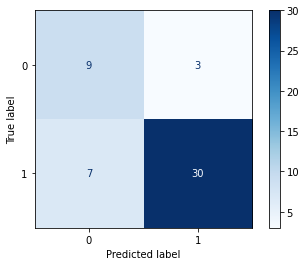

In [74]:
plot_confusion_matrix(xgb_opt_model, X_test, y_test, cmap = 'Blues');

# Import Additional MDVP Data on Parkinsons Disease

In [75]:
df_ParkData = pd.read_csv('https://raw.githubusercontent.com/pqrst/ParkinsonsDiseaseDataAnalysis/master/parkinsons_updrs.csv')

In [76]:
df_ParkData.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


Remove features to match those in data set for model development:

In [77]:
df_ParkData = df_ParkData.drop(columns = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Shimmer:APQ11'])

In [78]:
df_ParkData.head()

,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [79]:
df_ParkData.shape

(5875, 15)

Create an array of positive diagnoses of Parkinsons that is the length of the data set since all data is from those with Parkinsons Disease

In [80]:
Positive_Parks = np.ones(len(df_ParkData['NHR']))

Rename columns to match those in original data set used to create model

In [81]:
df_ParkData = df_ParkData.rename(columns={'Jitter(%)': 'MDVP:Jitter(%)', 'Jitter(Abs)': 'MDVP:Jitter(Abs)', 'Jitter:RAP': 'MDVP:RAP', 'Jitter:PPQ5': 'MDVP:PPQ', 'Shimmer': 'MDVP:Shimmer', 'Shimmer(dB)': 'MDVP:Shimmer(dB)'})


# Accuracy of Models on Additional Data

In [82]:
y_pred_pipe_knn = pipe.predict(df_ParkData)

In [83]:
accuracy_pipe_ParkData = accuracy_score(Positive_Parks, y_pred_pipe_knn)
print(accuracy_pipe_ParkData)

0.7651063829787234


In [84]:
y_pred_pipe1_knn = pipe1.predict(df_ParkData)

In [85]:
accuracy_pipe1_ParkData = accuracy_score(Positive_Parks, y_pred_pipe1_knn)
print(accuracy_pipe1_ParkData)

0.7697021276595745


In [86]:
y_pred_pipe_lgb = pipe_lgb.predict(df_ParkData)

In [87]:
accuracy_pipe_lgb_ParkData = accuracy_score(Positive_Parks, y_pred_pipe_lgb)
print(accuracy_pipe_lgb_ParkData)

0.7785531914893618


In [88]:
y_pred_lgb_best = lgb_best.predict(df_ParkData)

In [89]:
accuracy_lgb_best_ParkData = accuracy_score(Positive_Parks, y_pred_lgb_best)
print(accuracy_lgb_best_ParkData)

0.8502127659574468


In [90]:
y_pred_xgb = pipe_xgb.predict(df_ParkData)

In [91]:
accuracy_xgb = accuracy_score(Positive_Parks, y_pred_xgb)
print(accuracy_xgb)

0.8568510638297873


In [92]:
y_pred_xgb_opt = xgb_opt_model.predict(df_ParkData)

In [93]:
accuracy_xgb_opt = accuracy_score(Positive_Parks, y_pred_xgb_opt)
print(accuracy_xgb_opt)

0.8529361702127659


# Model Results Compiled

![picture](https://drive.google.com/uc?id=1XCyXwUEgrfgcxk1WfBBbBzRGjs34ZjEV)

# Final Model Evaluation

The Light Gradient Boosting Machine (LGBM) Optimized model was chosen as the best model for predicting a diagnosis of Parkinson's Disease from Multi-Dimensional Voice Program (MDVP) data. 

****************************************

* Overall, averaging the six samples of MDVP data for each individual did not 
show significant changes to model accuracy.  For this reason, those models created from unaveraged data were used during the final model evaluations.

* Although K-Nearest Neighbors (KNN) models had higher testing accuracies, the optimal n_neighbors was equal to one making the model extremely overfit.  The results of the overfitting was seen when the KNN Optimized model scored a 77% accuracy when run on additional data that was separate data from which the model was created.  KNN also scored the lowest accuracy of all models on additional testing data (77%).

* The LGBM Optimized was chosen over the eXtreme Gradent Boosting Machine (XGBM) Optimized because although their accuracy scores both on the validation model and when run on additional data were the same, the LGBM Optimized predicted fewer false negatives. LGBM Optimized had a 1% chance of predicting false negatives and the XGBM Optimized had a 3.6% chance at predicting a false negative. In predicting Parkinson's Disease, false negatives lead to individuals not getting the correct diagnosis of PD, preventing treatment which is an undesirable outcome.

* The data set used for modeling in this project was small and thus limited the ability to create models with higher accuracies.  However, with accuracies on additional data that were in the mid 80% range, the ease and non-invasive nature of collection using MDVP data does show promise in predicting a diagnosis of Parkinson's disease and further analysis is warrented.